# **YZV 302E Deep Learning Project: SignSense: Deep Learning-based Sign Language Recognition and Translation**

### Hasan Taha Bağcı - 150210338

In [1]:
import torch
import os
import cv2
import matplotlib.pyplot as plt

from utils.original_model import OriginalModel
from utils.vgg16_model import VGG16Model
from utils.resnet_model import ResNet50Model
from utils.get_hand import detect_hand

## Defining the Initial Parameters

In [2]:
dataset_path = "dataset"
train_size = 0.85
batch_size = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 25

## Training the Models

### Original Model

In [3]:
original = OriginalModel(dataset_path, train_size, batch_size, device, num_epochs)

In [ ]:
original.train()

### ResNet50 Model

In [4]:
resnet = ResNet50Model(dataset_path, train_size, batch_size, device, num_epochs)

In [ ]:
resnet.train()

### VGG16 Model

In [5]:
vgg16 = VGG16Model(dataset_path, train_size, batch_size, device, num_epochs)

In [ ]:
vgg16.train()

## Tests with Manual Input

Crop the hand from the image

180 96 342 320


I0000 00:00:1705253137.703340       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


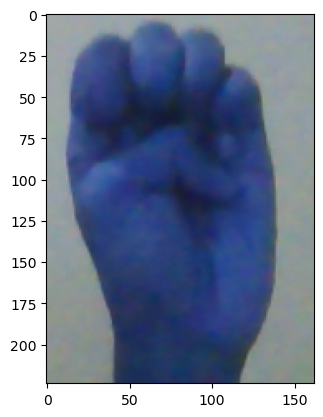

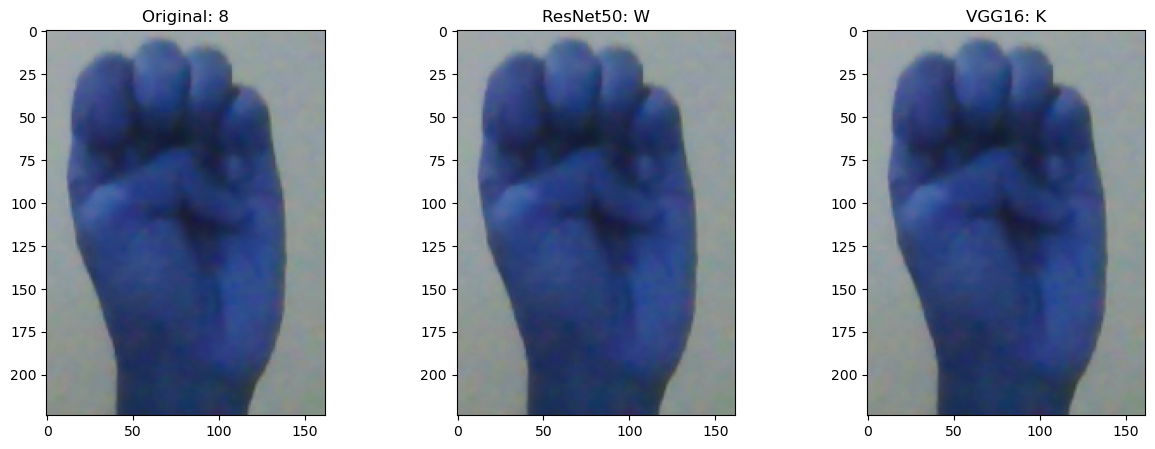

In [10]:
test_images = os.listdir("tests")
img = cv2.imread("tests/" + test_images[5])
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

x_min, y_min, x_max, y_max = detect_hand(img)
new_img = img[y_min:y_max, x_min:x_max]

print(x_min, y_min, x_max, y_max)
plt.imshow(new_img)
plt.show()

result_original = original.predict(new_img)[0][0]
result_resnet = resnet.predict(new_img)[0][0]
result_vgg16 = vgg16.predict(new_img)[0][0]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(new_img)
plt.title("Original: " + str(result_original))
plt.subplot(1, 3, 2)
plt.imshow(new_img)
plt.title("ResNet50: " + str(result_resnet))
plt.subplot(1, 3, 3)
plt.imshow(new_img)
plt.title("VGG16: " + str(result_vgg16))
plt.show()



